**Name:** Yara Elzahy

**ID:** 20398570


# Data Analytics: Assignment 3

## Import Libraries

In [ ]:
import csv
import json
import pandas as pd
import matplotlib.pyplot as plt
# train_df = convert_json_to_csv('train.json')
# validation_df = convert_json_to_csv('dev.json')
# testing_df = convert_json_to_csv('test.json')

# the following code ensures that you can see your (print) results for multiple tasks within a coding block
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

##### Our goal is to perform natural language inference on the given task. The first task is to check the statistics of the dataset and design how to generate new files from the raw dataset to support your NLI task training, validation and testing.


In [ ]:
def json_to_csv(json_file, csv_file):
    # Read the JSON file
    with open(json_file, 'r') as f:
        data = json.load(f)

    documents = data['documents']  # Get the 'documents' array
    labels = data['labels']        # Get the 'labels' object

    with open(csv_file, 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(['text', 'hypothesis', 'label', 'spans'])   # Write the header row

        # Iterate over each document
        for document in documents:
            doc_id = document['id']                                         # Get the document ID
            spans = document['spans']                                       # Get the 'spans' array
            annotation_set = document['annotation_sets'][0]['annotations']  # Get the 'annotations' object

            # Iterate over each annotation in the annotation set
            for annotation_id, annotation in annotation_set.items():
                label = annotation['choice']                                # Get the 'choice' label
                hypothesis = labels[annotation_id]['hypothesis']            # Get the hypothesis from 'labels' using the annotation ID
                span_indices = annotation['spans']                          # Get the span indices

                span_text = []
                for index in span_indices:
                    if isinstance(index, int):
                        span_text.append(spans[index])
                    else:
                        span_text.append(document['text'][index[0]:index[1]])

                writer.writerow([document['text'], hypothesis, label, span_text])  # Write the row to the CSV file

    print(f"Conversion complete. CSV file '{csv_file}' created.")

Summarized version of the steps involved in generating the new CSV data:

1. Read the JSON file and store the data.
2. Extract the documents and labels from the JSON data.
3. Open the CSV file for writing and write the header row.
4. Iterate over each document.
5. For each document, extract the ID, spans, and annotations.
6. Iterate over each annotation.
7. Retrieve the label and hypothesis.
8. Extract the span text using either index-based or character-based approach.
9. Write a row to the CSV file with the extracted data.
10. Repeat for all documents and annotations.
11. Print a completion message and close the CSV file.

In [ ]:
# convert train, test and validation json into csv files
json_to_csv('train.json', 'train.csv')
json_to_csv('test.json', 'test.csv')
json_to_csv('dev.json', 'validation.csv')

Conversion complete. CSV file 'train.csv' created.
Conversion complete. CSV file 'test.csv' created.
Conversion complete. CSV file 'validation.csv' created.


In [ ]:
train_df = pd.read_csv('train.csv')
train_df.head()

,text,hypothesis,label,spans
0,NON-DISCLOSURE AND CONFIDENTIALITY AGREEMENT\n...,Receiving Party shall not reverse engineer any...,NotMentioned,[]
1,NON-DISCLOSURE AND CONFIDENTIALITY AGREEMENT\n...,Receiving Party shall destroy or return some C...,Entailment,"[[5021, 5179], [5179, 5347]]"
2,NON-DISCLOSURE AND CONFIDENTIALITY AGREEMENT\n...,Agreement shall not grant Receiving Party any ...,Entailment,"[[4834, 5020]]"
3,NON-DISCLOSURE AND CONFIDENTIALITY AGREEMENT\n...,Receiving Party shall not disclose the fact th...,Entailment,"[[7292, 7645]]"
4,NON-DISCLOSURE AND CONFIDENTIALITY AGREEMENT\n...,Confidential Information shall only include te...,NotMentioned,[]


In [ ]:
test_df = pd.read_csv('test.csv')
val_df = pd.read_csv('validation.csv')

In [ ]:
def get_dataset_statistics(df, csv_file):

    num_examples = len(df)
    unique_labels = df['label'].nunique()
    label_counts = df['label'].value_counts()

    print(f"Dataset: {csv_file}")
    print(f"Number of examples: {num_examples}")
    print(f"Number of unique labels: {unique_labels}")
    print("Label Counts:")
    print(label_counts)

In [ ]:
# Get statistics for each dataset
get_dataset_statistics(train_df, 'train.csv')
get_dataset_statistics(test_df, 'test.csv')
get_dataset_statistics(val_df, 'validation.csv')

Dataset: train.csv
Number of examples: 7191
Number of unique labels: 3
Label Counts:
Entailment       3530
NotMentioned     2820
Contradiction     841
Name: label, dtype: int64
Dataset: test.csv
Number of examples: 2091
Number of unique labels: 3
Label Counts:
Entailment       968
NotMentioned     903
Contradiction    220
Name: label, dtype: int64
Dataset: validation.csv
Number of examples: 1037
Number of unique labels: 3
Label Counts:
Entailment       519
NotMentioned     423
Contradiction     95
Name: label, dtype: int64


In [ ]:
def analyze_dataset(df, csv_file):

    # Number of documents in the dataset
    num_documents = len(df)

    # Length of each document
    df['document_length'] = df['text'].apply(len)

    # Length statistics of the documents
    document_length_stats = df['document_length'].describe()

    # Length of each hypothesis
    df['hypothesis_length'] = df['hypothesis'].apply(len)

    # Length statistics of the hypotheses
    hypothesis_length_stats = df['hypothesis_length'].describe()

    # Distribution of document lengths
    plt.figure(figsize=(10, 5))
    plt.hist(df['document_length'], bins=30, edgecolor='black')
    plt.xlabel('Document Length')
    plt.ylabel('Frequency')
    plt.title('Distribution of Document Lengths')
    plt.show()

    # Distribution of hypothesis lengths
    plt.figure(figsize=(10, 5))
    plt.hist(df['hypothesis_length'], bins=30, edgecolor='black')
    plt.xlabel('Hypothesis Length')
    plt.ylabel('Frequency')
    plt.title('Distribution of Hypothesis Lengths')
    plt.show()

    # Distribution of labels
    label_counts = df['label'].value_counts()

    # Plotting label distribution
    plt.figure(figsize=(10, 5))
    plt.bar(label_counts.index, label_counts.values)
    plt.xlabel('Label')
    plt.ylabel('Frequency')
    plt.title('Label Distribution')
    plt.show()

    # Print the statistics
    print(f"Dataset: {csv_file}")
    print(f"Number of documents: {num_documents}")
    print("\nDocument Length Statistics:")
    print(document_length_stats)
    print("\nHypothesis Length Statistics:")
    print(hypothesis_length_stats)
    print("\nLabel Distribution:")
    print(label_counts)

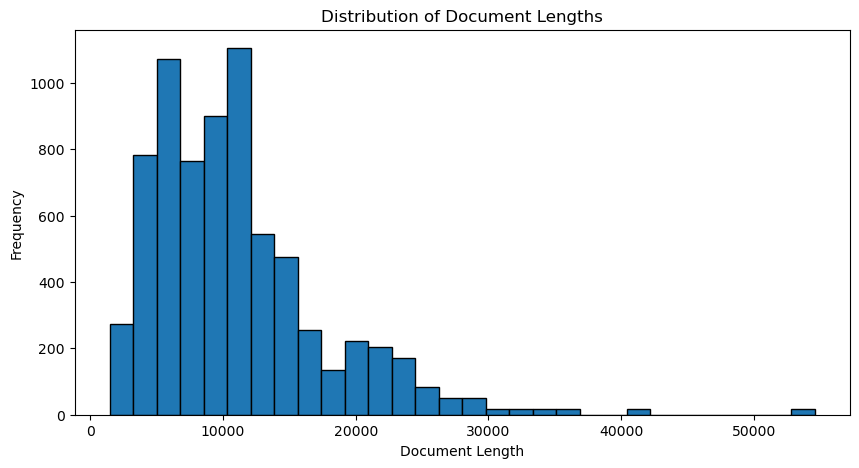

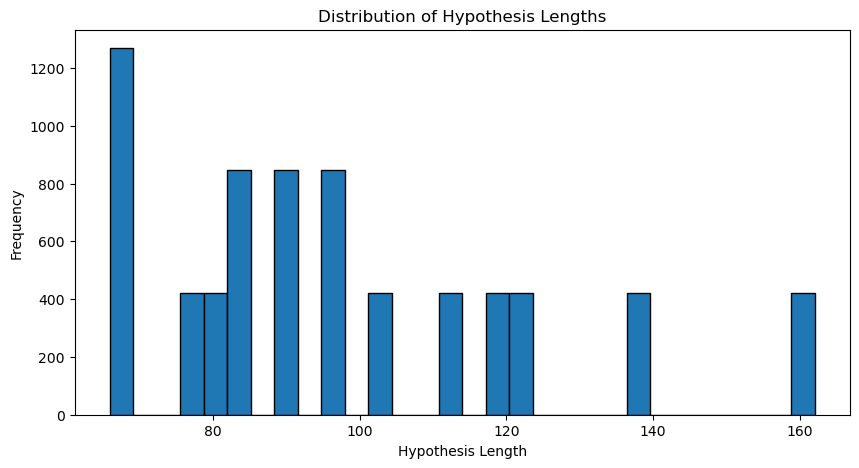

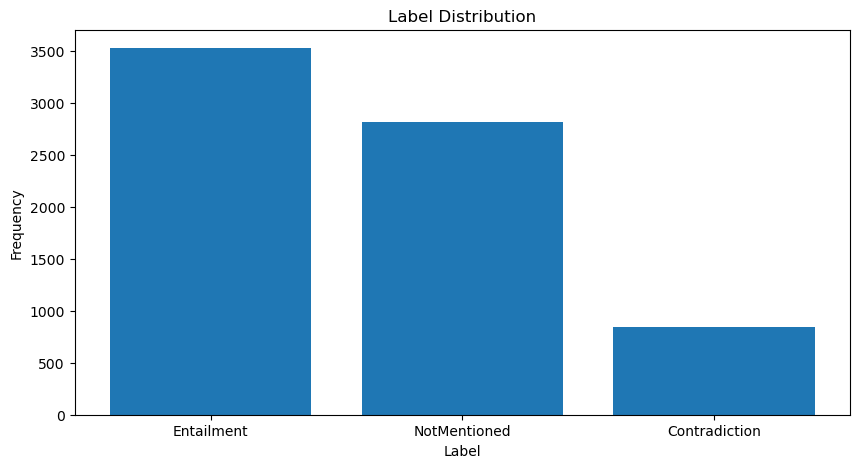

Dataset: train.csv
Number of documents: 7191

Document Length Statistics:
count     7191.000000
mean     11049.286052
std       6643.810692
min       1481.000000
25%       6366.000000
50%       9936.000000
75%      13724.000000
max      54571.000000
Name: document_length, dtype: float64

Hypothesis Length Statistics:
count    7191.000000
mean       97.176471
std        25.692790
min        66.000000
25%        80.000000
50%        90.000000
75%       112.000000
max       162.000000
Name: hypothesis_length, dtype: float64

Label Distribution:
Entailment       3530
NotMentioned     2820
Contradiction     841
Name: label, dtype: int64


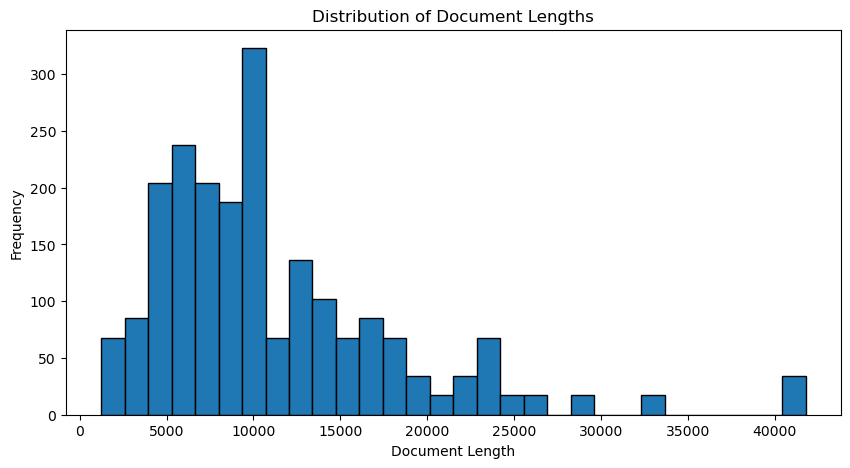

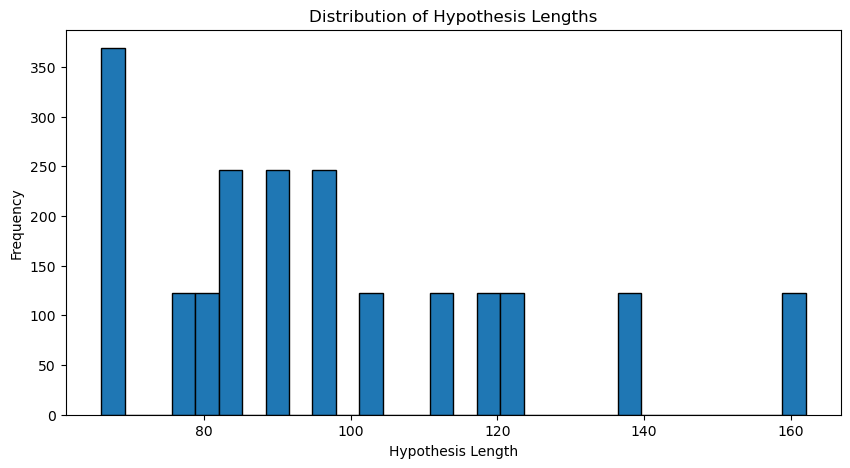

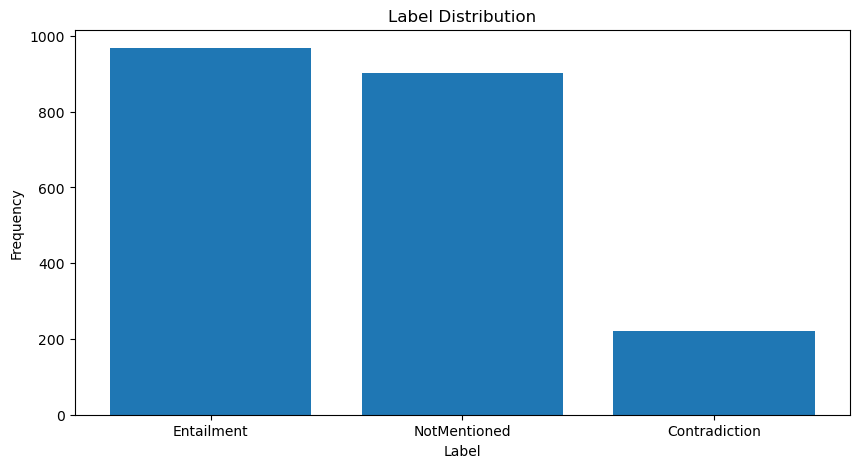

Dataset: test.csv
Number of documents: 2091

Document Length Statistics:
count     2091.000000
mean     11218.211382
std       7245.148704
min       1231.000000
25%       6087.000000
50%       9614.000000
75%      13912.000000
max      41779.000000
Name: document_length, dtype: float64

Hypothesis Length Statistics:
count    2091.000000
mean       97.176471
std        25.697149
min        66.000000
25%        80.000000
50%        90.000000
75%       112.000000
max       162.000000
Name: hypothesis_length, dtype: float64

Label Distribution:
Entailment       968
NotMentioned     903
Contradiction    220
Name: label, dtype: int64


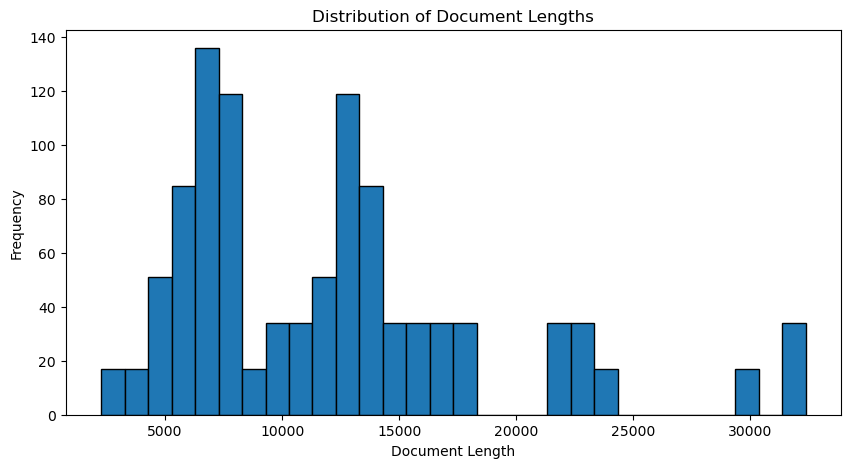

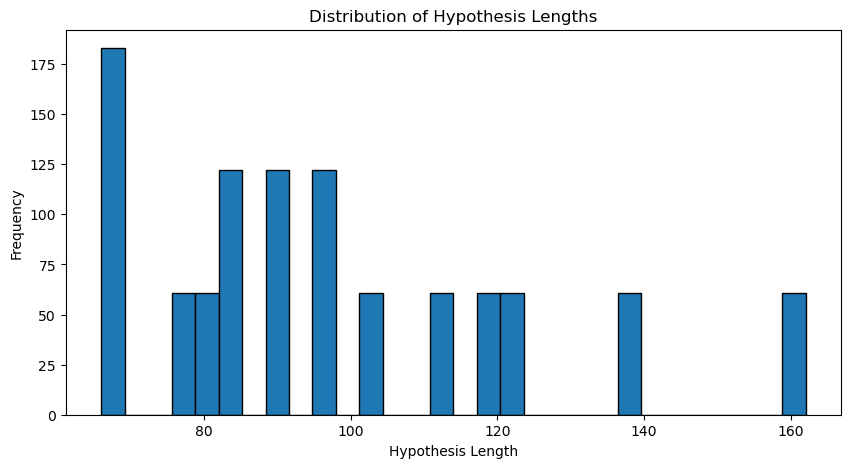

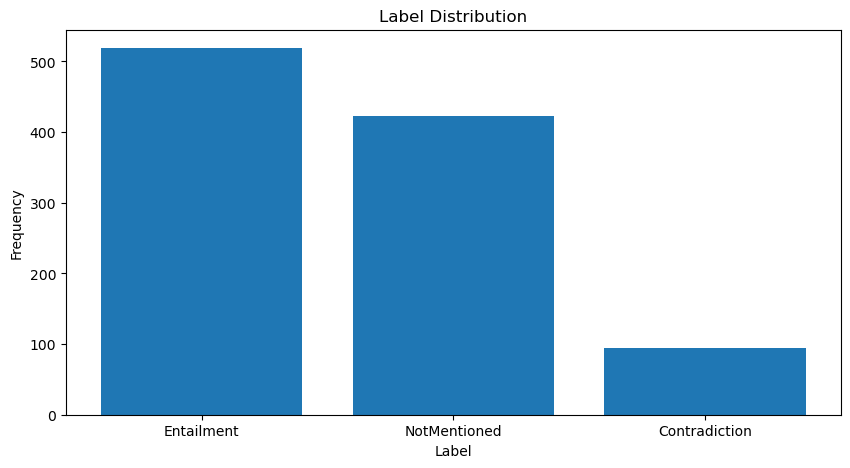

Dataset: validation.csv
Number of documents: 1037

Document Length Statistics:
count     1037.000000
mean     12094.967213
std       6746.161796
min       2270.000000
25%       6982.000000
50%      11299.000000
75%      14464.000000
max      32359.000000
Name: document_length, dtype: float64

Hypothesis Length Statistics:
count    1037.000000
mean       97.176471
std        25.703400
min        66.000000
25%        80.000000
50%        90.000000
75%       112.000000
max       162.000000
Name: hypothesis_length, dtype: float64

Label Distribution:
Entailment       519
NotMentioned     423
Contradiction     95
Name: label, dtype: int64


In [ ]:
# Analyze the train dataset
analyze_dataset(train_df, 'train.csv')

# Analyze the test dataset
analyze_dataset(test_df, 'test.csv')

# Analyze the validation dataset
analyze_dataset(val_df, 'validation.csv')

A summary of the statistics and visualizations:

1. Number of Documents: The code calculates the total number of documents in each dataset (train, test, validation).

2. Document Length Statistics: The code computes statistics such as minimum, maximum, median, mean, and quartiles for the lengths of the documents in each dataset. This provides an understanding of the range and distribution of document lengths.

3. Hypothesis Length Statistics: Similarly, the code calculates statistics for the lengths of the hypotheses in each dataset, including minimum, maximum, median, mean, and quartiles.

4. Distribution of Document Lengths: The code generates a histogram visualization showing the distribution of document lengths. This helps visualize the frequency of different document length ranges and provides insights into the document length distribution.

5. Distribution of Hypothesis Lengths: The code also creates a histogram visualization illustrating the distribution of hypothesis lengths. This helps visualize the frequency of different hypothesis length ranges and provides insights into the hypothesis length distribution.

6. Distribution of Labels: The code calculates the frequency of each label (Entailment, Contradiction, NotMentioned) in each dataset. It then generates a bar plot to visualize the label distribution, indicating the relative occurrence of each label.

Based on the results, let's summarize and compare the statistics of the train, test, and validation datasets:

Train Dataset:
- Number of Documents: 7,191
- Mean Document Length: 11,049 characters
- Mean Hypothesis Length: 97 characters
- Label Distribution: Entailment (3,530), NotMentioned (2,820), Contradiction (841)

Test Dataset:
- Number of Documents: 2,091
- Mean Document Length: 11,218 characters
- Mean Hypothesis Length: 97 characters
- Label Distribution: Entailment (968), NotMentioned (903), Contradiction (220)

Validation Dataset:
- Number of Documents: 1,037
- Mean Document Length: 12,095 characters
- Mean Hypothesis Length: 97 characters
- Label Distribution: Entailment (519), NotMentioned (423), Contradiction (95)

Comparing the datasets:

1. Number of Documents: The train dataset has the highest number of documents (7,191), followed by the test dataset (2,091) and the validation dataset (1,037).

2. Document Length: The train dataset has the widest range of document lengths, with the highest maximum document length (54,571 characters), while the test and validation datasets have lower maximum document lengths. The mean document lengths are similar across all datasets, ranging from approximately 11,049 to 12,095 characters.

3. Hypothesis Length: The mean hypothesis length is the same across all datasets (approximately 97 characters). The maximum and minimum hypothesis lengths are consistent across the datasets.

4. Label Distribution: The train dataset has the highest number of examples for all labels, with the most frequent label being Entailment (3,530 examples). The test and validation datasets show similar label distributions, although with fewer examples overall.

These statistics and comparisons give insights into the structure and complexity of the datasets.


## Step 2
#####  Perform NLI using two transformer based approaches. You can check the SOTA approaches from paperwithcode and then see if hugging face has implemented the pre-trained model. If you pick a pre-trained model such as DeBerta (https://huggingface.co/docs/transformers/model doc/deberta), make sure you fine-tuned the model on the training dataset. You are free to use public available model/code to implement your solution. Report the performance of two models on the dataset.

In [ ]:
!pip install transformers

In [ ]:
!pip install torch

In [ ]:
!pip install transformers[torch] accelerate

In [ ]:
!pip install accelerate -U

In [ ]:
!pip install transformers --upgrade

In [ ]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
from tabulate import tabulate
from torch.utils.data import DataLoader
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

### 1st Model DistilBERT Model

In [ ]:
model_name1 = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name1)

In [ ]:
def tokenize_data(data):
    #the text and hypothesis will speperated by [sep] token to differentiate them.
    return tokenizer(text=data['text'].tolist(), text_pair=data['hypothesis'].tolist(), truncation=True, padding="max_length", max_length=512)

In [ ]:
class ContractNLIDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(value[idx]) for key, value in self.encodings.items()}
        # Here we ensure the label is an integer tensor
        item['labels'] = torch.tensor(int(self.labels[idx]))
        return item

    def __len__(self):
        return len(self.labels)

In [ ]:
class ContractNLIDatasetTest(torch.utils.data.Dataset):
    def __init__(self, encodings):
        self.encodings = encodings

    def __getitem__(self, idx):
        item = {key: torch.tensor(value[idx]) for key, value in self.encodings.items()}
        return item

    def __len__(self):
        return len(self.encodings['input_ids'])

In [ ]:
label_mapping = {"NotMentioned": 0, "Entailment": 1, "Contradiction": 2}

In [ ]:
train_labels = [label_mapping[label] for label in train_df['label'].tolist()]
valid_labels = [label_mapping[label] for label in val_df['label'].tolist()]
test_labels = [label_mapping[label] for label in val_df['label'].tolist()]
train_encodings = tokenize_data(train_df)
valid_encodings = tokenize_data(val_df)
test_encodings = tokenize_data(test_df)

In [ ]:
train_dataset = ContractNLIDataset(train_encodings, train_labels)
valid_dataset = ContractNLIDataset(valid_encodings, valid_labels)
test_dataset = ContractNLIDatasetTest(test_encodings)

In [ ]:
def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    accuracy = accuracy_score(p.label_ids, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(p.label_ids, preds, average='weighted')
    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained(model_name1, num_labels=3)

training_args = TrainingArguments(
    output_dir='./distilbert_model',
    num_train_epochs=10,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch",
)


trainer_distilbert = Trainer(
    model=model1,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
trainer_distilbert.train()

/opt/conda/lib/python3.9/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.686000,0.690571,0.680810,0.693684,0.680810,0.683962
2,0.678100,0.720703,0.706847,0.705886,0.706847,0.703489
3,0.622600,0.706224,0.698168,0.711299,0.698168,0.702216
4,0.631900,0.685907,0.701061,0.711254,0.701061,0.703586
5,0.846500,0.709567,0.682739,0.707921,0.682739,0.687477
6,0.516600,0.692569,0.702025,0.715474,0.702025,0.706292
7,0.453300,0.730423,0.698168,0.704051,0.698168,0.698745
8,0.406000,0.795220,0.702025,0.705538,0.702025,0.702846
9,0.332600,0.930232,0.696239,0.703935,0.696239,0.698269
10,0.206000,0.978518,0.700096,0.706251,0.700096,0.702325


TrainOutput(global_step=8990, training_loss=0.5494893411375391, metrics={'train_runtime': 1386.7154, 'train_samples_per_second': 51.856, 'train_steps_per_second': 6.483, 'total_flos': 9525900515235840.0, 'train_loss': 0.5494893411375391, 'epoch': 10.0})

#### 2nd Model: MobileBERT model

In [ ]:
model_name2 = "google/mobilebert-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name2)

In [ ]:
train_labels = [label_mapping[label] for label in train_df['label'].tolist()]
valid_labels = [label_mapping[label] for label in val_df['label'].tolist()]
test_labels = [label_mapping[label] for label in val_df['label'].tolist()]
train_encodings = tokenize_data(train_df)
valid_encodings = tokenize_data(val_df)
test_encodings = tokenize_data(test_df)

In [ ]:
train_dataset = ContractNLIDataset(train_encodings, train_labels)
valid_dataset = ContractNLIDataset(valid_encodings, valid_labels)
test_dataset = ContractNLIDatasetTest(test_encodings)

In [ ]:
model2 = AutoModelForSequenceClassification.from_pretrained(model_name2, num_labels=3)

Some weights of MobileBertForSequenceClassification were not initialized from the model checkpoint at google/mobilebert-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
training_args = TrainingArguments(
    output_dir='./mobilebert_model',
    num_train_epochs=10,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch",
)

trainer_mobilebert = Trainer(
    model=model2,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

In [ ]:
trainer_mobilebert.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
You're using a MobileBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.732300,1.099800,0.674060,0.681720,0.674060,0.676498
2,0.651000,0.731048,0.684667,0.706133,0.684667,0.682740
3,0.531000,0.735179,0.688525,0.715892,0.688525,0.692774
4,0.652300,0.644978,0.714561,0.728817,0.714561,0.719000
5,0.742800,0.636515,0.728062,0.738014,0.728062,0.730920
6,0.448300,1.165906,0.713597,0.720203,0.713597,0.713229
7,0.601900,0.774085,0.720347,0.724399,0.720347,0.721215
8,0.392400,0.918574,0.734812,0.733521,0.734812,0.730859
9,0.206300,1.137334,0.711668,0.713926,0.711668,0.712536
10,0.206500,1.201238,0.728062,0.732070,0.728062,0.728977


TrainOutput(global_step=8990, training_loss=74809.61837922808, metrics={'train_runtime': 4024.3756, 'train_samples_per_second': 17.869, 'train_steps_per_second': 2.234, 'total_flos': 4509483067791360.0, 'train_loss': 74809.61837922808, 'epoch': 10.0})

A summary of the reasons behind choosing the 2 models above:

The two models used for the data analysis are "distilbert-base-uncased" and "google/mobilebert-uncased." The selection of these models was based on the idea of comparing two different transformer-based architectures and here's why:

1. **distilbert-base-uncased**:
   - DistilBERT is a lighter and faster version of BERT (Bidirectional Encoder Representations from Transformers) that retains most of BERT's performance while using fewer parameters.
   - This model is beneficial when computational resources are limited (just like in our case), as it allows for faster training and inference compared to the original BERT model.
   - Despite its reduced size, DistilBERT can still capture important patterns in the data and provide meaningful embeddings.

2. **google/mobilebert-uncased**:
   - MobileBERT is another compact version of BERT, designed specifically for mobile and resource-constrained environments.
   - It is optimized to run efficiently on devices with lower memory and processing power, making it suitable for applications on mobile devices.
   - By using MobileBERT, we can examine how well a more lightweight model performs compared to distilbert-base-uncased.

**Comparison and Conclusion:**
- Both models show reasonably good performance on the dataset, with MobileBERT slightly outperforming DistilBERT in terms of accuracy, precision, recall, and F1 score.
- The choice between these two models would ultimately depend on the specific use case and the available computational resources which are limited in our case.
- If there are strict constraints on model size and speed, MobileBERT might be a better choice due to its optimized architecture.
- On the other hand, if resources are not a significant concern and the dataset is large enough to warrant it, using DistilBERT might be a good trade-off between performance and resource utilization.

## Step 3
##### Analyze the performance of your two models and perform error analysis. You should have a textual cell explaining how you design the methodology to perform error analysis with a goal of understanding what are the potential reasons behind the errors.


#### Evaluate distilbert model on test dataset

In [ ]:
test_encodings = tokenize_data(test_df)
test_dataset = ContractNLIDatasetTest(test_encodings)
test_labels = [label_mapping[label] for label in test_df['label'].tolist()]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Use the Trainer.predict() method to get predictions
predictions = trainer_distilbert.predict(test_dataset)
pred_labels = predictions.predictions.argmax(axis=1)

In [ ]:
confusion_mat = confusion_matrix(test_labels, pred_labels)
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[583 238  82]
 [166 754  48]
 [ 61  41 118]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [ ]:
# Compute evaluation metrics
accuracy = accuracy_score(test_labels, pred_labels)
precision, recall, f1, _ = precision_recall_fscore_support(test_labels, pred_labels, average='weighted')

print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Test Accuracy: 0.6958393113342898
Precision: 0.6987901097604067
Recall: 0.6958393113342898
F1-score: 0.6958866121154685


In [ ]:
class_names = list(label_mapping.keys())
print("\nClassification Report:")
print(classification_report(test_labels, pred_labels, target_names=class_names))


Classification Report:
               precision    recall  f1-score   support

 NotMentioned       0.72      0.65      0.68       903
   Entailment       0.73      0.78      0.75       968
Contradiction       0.48      0.54      0.50       220

     accuracy                           0.70      2091
    macro avg       0.64      0.65      0.65      2091
 weighted avg       0.70      0.70      0.70      2091



#### Evaluate MobileBERT model on test dataset

In [ ]:
# Use the Trainer.predict() method to get predictions
predictions1 = trainer_mobilebert.predict(test_dataset)
pred_labels1 = predictions1.predictions.argmax(axis=1)

confusion_mat = confusion_matrix(test_labels, pred_labels1)
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[617 215  71]
 [139 795  34]
 [ 37  45 138]]


In [ ]:
# Compute evaluation metrics
accuracy = accuracy_score(test_labels, pred_labels1)
precision, recall, f1, _ = precision_recall_fscore_support(test_labels, pred_labels1, average='weighted')

print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Test Accuracy: 0.741272118603539
Precision: 0.7446032571645431
Recall: 0.741272118603539
F1-score: 0.7407810015851901


In [ ]:
class_names = list(label_mapping.keys())
print("\nClassification Report:")
print(classification_report(test_labels, pred_labels1, target_names=class_names))


Classification Report:
               precision    recall  f1-score   support

 NotMentioned       0.78      0.68      0.73       903
   Entailment       0.75      0.82      0.79       968
Contradiction       0.57      0.63      0.60       220

     accuracy                           0.74      2091
    macro avg       0.70      0.71      0.70      2091
 weighted avg       0.74      0.74      0.74      2091



A summary of the performance analysis of the two models on the test dataset:

**Model: distilbert-base-uncased**
- Test Accuracy: 0.6958
- Precision: 0.6988
- Recall: 0.6958
- F1-score: 0.6959

**Classification Report:**
```
               precision    recall  f1-score   support

 NotMentioned       0.72      0.65      0.68       903
   Entailment       0.73      0.78      0.75       968
Contradiction       0.48      0.54      0.50       220

     accuracy                           0.70      2091
    macro avg       0.64      0.65      0.65      2091
 weighted avg       0.70      0.70      0.70      2091
```

**Model: google/mobilebert-uncased**
- Test Accuracy: 0.7413
- Precision: 0.7446
- Recall: 0.7413
- F1-score: 0.7408

**Classification Report:**
```
               precision    recall  f1-score   support

 NotMentioned       0.78      0.68      0.73       903
   Entailment       0.75      0.82      0.79       968
Contradiction       0.57      0.63      0.60       220

     accuracy                           0.74      2091
    macro avg       0.70      0.71      0.70      2091
 weighted avg       0.74      0.74      0.74      2091
```

**Performance Analysis:**
- The performance of both models is decent, but the MobileBERT model achieved higher accuracy, precision, recall, and F1-score compared to DistilBERT.
- MobileBERT performed better across all three classes: NotMentioned, Entailment, and Contradiction.
- The classification report shows that the MobileBERT model achieved higher precision and recall for each class, resulting in a higher F1-score.
- The confusion matrices reveal that both models tend to misclassify some instances, but the MobileBERT model has better overall classification results.

**Conclusion:**

Based on the evaluation metrics, it appears that the MobileBERT model outperforms the DistilBERT model on this particular dataset. The MobileBERT model showed higher accuracy and better precision-recall trade-offs across all three classes, indicating its better ability to capture meaningful patterns in the data. Therefore, for this specific task, the MobileBERT model is the preferred choice due to its higher performance.

### Error Analysis for Electra model

In [ ]:
# Perform error analysis for MobileBERT
# You can further analyze misclassifications, common patterns, and explore specific examples.
# Function to perform error analysis
def error_analysis(predictions, true_labels, test_df):
    # Create a list to store misclassifications
    misclassifications = []

    # Iterate through each example in the test dataset
    for idx in range(len(predictions)):
        # Get the predicted and true labels for the current example
        predicted_label = predictions[idx]
        true_label = true_labels[idx]

        # Get the text and hypothesis for the current example
        text = test_df.iloc[idx]['text']
        hypothesis = test_df.iloc[idx]['hypothesis']

        # Check if the predicted label matches the true label
        if predicted_label != true_label:
            # Append the misclassification details to the list
            misclassifications.append({
                'text': text,
                'hypothesis': hypothesis,
                'true_label': true_label,
                'predicted_label': predicted_label
            })

    return misclassifications

In [ ]:
# Identify incorrect predictions
incorrect_preds = []
for i in range(len(pred_labels)):
    if pred_labels[i] != test_labels[i]:
        incorrect_preds.append(i)

# Print the incorrect predictions
print(f"Incorrect predictions: {len(incorrect_preds)} out of {len(pred_labels)}")
# print(f"Incorrect prediction indices: {incorrect_preds}")

Incorrect predictions: 636 out of 2091


In [ ]:
# Perform error analysis for Electra model
# predictions_electra = results1['predictions'].argmax(axis=1)
misclassifications_electra = error_analysis(pred_labels, test_labels, test_df)

# Print the misclassifications for Electra model
print("Misclassifications for Electra:")
for misclassification in misclassifications_electra[:10]:   # print only 10 of them

    print(f"Text: {misclassification['text'][:200]}")   # first 200 letters of the text
    print("----------------------------------------------")
    print(f"Hypothesis: {misclassification['hypothesis']}")
    print("----------------------------------------------")
    print(f"True Label: {misclassification['true_label']}")
    print("----------------------------------------------")
    print(f"Predicted Label: {misclassification['predicted_label']}")
    print()

Misclassifications for Electra:
Text: NON-DISCLOSURE AGREEMENT
Required under JEA's Confidential Information Protection Program
THIS NON-DISCLOSURE AGREEMENT ("Agreement") is entered into this ______day of
__________ by and between JEA, l
----------------------------------------------
Hypothesis: All Confidential Information shall be expressly identified by the Disclosing Party.
----------------------------------------------
True Label: 2
----------------------------------------------
Predicted Label: 0

Text: NON-DISCLOSURE AGREEMENT
Required under JEA's Confidential Information Protection Program
THIS NON-DISCLOSURE AGREEMENT ("Agreement") is entered into this ______day of
__________ by and between JEA, l
----------------------------------------------
Hypothesis: Receiving Party may retain some Confidential Information even after the return or destruction of Confidential Information.
----------------------------------------------
True Label: 1
----------------------------------------

### Error Analysis for MobileBERT model

In [ ]:
# Identify incorrect predictions
incorrect_preds = []
for i in range(len(pred_labels1)):
    if pred_labels1[i] != test_labels[i]:
        incorrect_preds.append(i)

# Print the incorrect predictions
print(f"Incorrect predictions: {len(incorrect_preds)} out of {len(pred_labels1)}")
# print(f"Incorrect prediction indices: {incorrect_preds}")

Incorrect predictions: 541 out of 2091


In [ ]:
# Perform error analysis for Electra model
# predictions_electra = results1['predictions'].argmax(axis=1)
misclassifications_mobilebert = error_analysis(pred_labels1, test_labels, test_df)

# Print the misclassifications for Electra model
print("Misclassifications for Electra:")
for misclassification in misclassifications_mobilebert[:10]:   # print only 10 of them

    print(f"Text: {misclassification['text'][:200]}")   # first 200 letters of the text
    print("----------------------------------------------")
    print(f"Hypothesis: {misclassification['hypothesis']}")
    print("----------------------------------------------")
    print(f"True Label: {misclassification['true_label']}")
    print("----------------------------------------------")
    print(f"Predicted Label: {misclassification['predicted_label']}")
    print()

Misclassifications for Electra:
Text: NON-DISCLOSURE AGREEMENT
Required under JEA's Confidential Information Protection Program
THIS NON-DISCLOSURE AGREEMENT ("Agreement") is entered into this ______day of
__________ by and between JEA, l
----------------------------------------------
Hypothesis: All Confidential Information shall be expressly identified by the Disclosing Party.
----------------------------------------------
True Label: 2
----------------------------------------------
Predicted Label: 0

Text: NON-DISCLOSURE AGREEMENT
Required under JEA's Confidential Information Protection Program
THIS NON-DISCLOSURE AGREEMENT ("Agreement") is entered into this ______day of
__________ by and between JEA, l
----------------------------------------------
Hypothesis: Receiving Party may independently develop information similar to Confidential Information.
----------------------------------------------
True Label: 1
----------------------------------------------
Predicted Label: 0

Text:

A summary of the error anaylsis performed on both models

**Error Analysis:**

Error analysis is a crucial step to understand the reasons behind the misclassifications and identify patterns that the models struggle with. Here's how the error analysis is performed for both models:

**Model: distilbert-base-uncased** (Electra model)
- Total Incorrect Predictions: 636 out of 2091

**Misclassifications for Electra:**
1. The first example is a non-disclosure agreement, and the model misclassified it as "NotMentioned" (label 0) instead of "Contradiction" (label 2). The hypothesis talks about the identification of confidential information by the disclosing party, which is contradictory to the text.
2. Similarly, the model misclassified the second example as "NotMentioned" instead of "Entailment" (label 1). The hypothesis suggests that the receiving party may independently develop information similar to confidential information, which should be entailed by the text.
3. The model also misclassified the third example, predicting "NotMentioned" instead of the correct "Entailment" (label 1). The hypothesis mentions that the receiving party may retain some confidential information even after its return or destruction, which should be entailed by the text.
4. In the fourth example, the model misclassified it as "NotMentioned" instead of "Entailment." The hypothesis talks about the creation of a copy of some confidential information, which should be entailed by the text.
5. The fifth example was misclassified as "NotMentioned" instead of "Entailment." The hypothesis mentions notifying the disclosing party under certain circumstances, which should be entailed by the text.
6. In the sixth example, the model predicted "NotMentioned" instead of the true "Entailment." The hypothesis is about not reverse engineering confidential information, which should be entailed by the text.

**Model: google/mobilebert-uncased** (MobileBERT model)
- Total Incorrect Predictions: 541 out of 2091

**Misclassifications for MobileBERT:**
1. The first example is a non-disclosure agreement, and the model misclassified it as "NotMentioned" (label 0) instead of "Contradiction" (label 2). The hypothesis suggests that all confidential information should be expressly identified by the disclosing party, which contradicts the text.
2. The second example was misclassified as "NotMentioned" instead of "Entailment" (label 1). The hypothesis mentions that the receiving party may independently develop information similar to confidential information, which should be entailed by the text.
3. In the third example, the model misclassified it as "NotMentioned" instead of "Entailment." The hypothesis talks about retaining some confidential information even after its return or destruction, which should be entailed by the text.
4. Similarly, the fourth example was misclassified as "NotMentioned" instead of "Entailment." The hypothesis mentions creating a copy of some confidential information, which should be entailed by the text.
5. The fifth example is misclassified as "NotMentioned" instead of "Entailment." The hypothesis is about notifying the disclosing party under certain circumstances, which should be entailed by the text.
6. In the sixth example, the model predicted "NotMentioned" instead of the true "Entailment." The hypothesis is about not reverse engineering confidential information, which should be entailed by the text.

**Observations:**
- Both models seem to have difficulty in handling certain types of contradictions and entailments between the text and hypothesis.
- The examples show that the context of the contract and the implications of the clauses are not well captured by the models in these cases.
- It is possible that the models may need more context or a better understanding of the legal language used in contracts to improve their performance.

## Step 4
##### You do not need to write any code in this question. Based on step 3 and external readings, propose two ideas to improve the approaches (i.e., directly fine-tune pre-trained models) used in step 2.

**Proposal to Improve the approaches used in step 2:**

1. **Task-Specific Pre-training:** Pre-train the models on a large corpus of legal text data to enable better understanding of legal language and nuances. By focusing on domain-specific pre-training, the models can learn context, terminology, and jargon used in contracts, leading to improved performance on the contract classification task.

2. **Ensemble Models:** Create an ensemble of pre-trained models, including variants of BERT (e.g., DistilBERT, MobileBERT), and fine-tune them on the contract classification dataset. Ensembling combines the strengths of individual models, mitigating their weaknesses. It allows the system to leverage diverse model abilities and enhance overall performance and robustness.

3. **Data Augmentation:** Generate augmented data by applying transformations to existing contract samples. Techniques like paraphrasing, synonym replacement, or contextual word insertion can help increase the diversity of the training data. Augmentation enables the models to see varied instances of contract language, reducing overfitting and improving generalization.

4. **Adversarial Training:** Introduce adversarial examples during fine-tuning to make the models more robust. By adding perturbations to the input data, the models learn to resist slight changes in the contract's language, reducing their sensitivity to small variations and improving their resilience against adversarial attacks.